In [2]:
import pickle
import numpy as np
import pandas as pd

In [3]:
pwd

'/imaging/students/Abhi/project'

In [4]:
path = '/imaging/students/Abhi/project/CheXpert_dataset/' # this path has the following ---> train/   train.csv   valid/   valid.csv

full_train_df = pd.read_csv(path + 'train.csv')
full_valid_df = pd.read_csv(path + 'valid.csv')

full_train_copy = full_train_df.copy()
full_valid_copy = full_valid_df.copy()

In [5]:
full_train_copy['Patient'] = [x.split('/')[2] for x in full_train_copy['Path']]
full_train_copy['Study'] = [x.split('/')[3] for x in full_train_copy['Path']]

full_valid_copy['Patient'] = [x.split('/')[2] for x in full_valid_copy['Path']]
full_valid_copy['Study'] = [x.split('/')[3] for x in full_valid_copy['Path']]

In [6]:
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices']

data_df_stat = []

for i in cols:
    minusOneVal = sum(np.where(full_train_copy[i] == -1,1,0))
    oneVal = sum(np.where(full_train_copy[i] == 1,1,0))
    zeroVal = sum(np.where(full_train_copy[i] == 0,1,0))
    nanVal = full_train_copy[i].isnull().sum()
    data_df_stat.append([i,minusOneVal,oneVal,zeroVal,nanVal])
    
data_df_stat = pd.DataFrame(data_df_stat)
data_df_stat.columns = ['Label','minusOneVal','oneVal','zeroVal','nanVal']

print(data_df_stat)

                         Label  minusOneVal  oneVal  zeroVal  nanVal
0                   No Finding            0   22381        0  201033
1   Enlarged Cardiomediastinum        12403   10798    21638  178575
2                 Cardiomegaly         8087   27000    11116  177211
3                 Lung Opacity         5598  105581     6599  105636
4                  Lung Lesion         1488    9186     1270  211470
5                        Edema        12984   52246    20726  137458
6                Consolidation        27742   14783    28097  152792
7                    Pneumonia        18770    6039     2799  195806
8                  Atelectasis        33739   33376     1328  154971
9                 Pneumothorax         3145   19448    56341  144480
10            Pleural Effusion        11628   86187    35396   90203
11               Pleural Other         2653    3523      316  216922
12                    Fracture          642    9040     2512  211220
13             Support Devices    

In [7]:
# Create a mask that checks for any -1 values across the specified columns
mask = (full_train_copy[cols] != -1).all(axis=1)

# Create a new DataFrame without rows containing -1 becuase -1 implies that the annotator (radiologist) was uncertain
# hence we do not want to confuse the model and by brining noise to the supervision this way by using uncertain labels
# there is still plenty of data that can be worked with without the -1 in the the columns 
df_without_minus = full_train_copy[mask]

# Get the count of rows in df_without_minus
row_count = df_without_minus.shape[0]

print(f"The number of rows in df_without_minus: {row_count}")

The number of rows in df_without_minus: 138358


In [8]:
df_without_minus = df_without_minus.replace(np.nan, 0.0)
df_data = df_without_minus
# df_data.head()

In [9]:
print(df_data.shape)
df_data.head()

(138358, 21)


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003,study1
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00005,study1


In [10]:
df_without_minus.size

2905518

In [11]:
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices']

In [12]:
import pandas as pd

# Assuming df_data is the DataFrame and 'cols' contains the class columns
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Copy the original DataFrame to avoid modifying it directly
df_single_class = df_data.copy()

# Iterate over the rows and select the first '1' encountered in the class columns
for index, row in df_single_class.iterrows():
    # Find the class columns where the value is 1
    class_values = row[cols] == 1
    # If multiple classes are '1', keep only the first class as '1' and set others to '0'
    if class_values.sum() > 1:
        first_class = class_values.idxmax()  # Get the first class column with '1'
        df_single_class.loc[index, cols] = 0  # Set all class columns to '0'
        df_single_class.loc[index, first_class] = 1  # Set the first class to '1'

# Display the updated DataFrame
df_single_class.head()


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00001,study1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003,study1
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00004,study1
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00005,study1


In [13]:
df_chexpert_test = df_single_class[100000:125000]

Frequency Count for Each Class:
No Finding: 22271.0
Enlarged Cardiomediastinum: 7106.0
Cardiomegaly: 16459.0
Lung Opacity: 43556.0
Lung Lesion: 2426.0
Edema: 13221.0
Consolidation: 3688.0
Pneumonia: 721.0
Atelectasis: 7980.0
Pneumothorax: 6021.0
Pleural Effusion: 6397.0
Pleural Other: 451.0
Fracture: 1988.0
Support Devices: 1817.0

Total occurrences across all classes: 134102.0


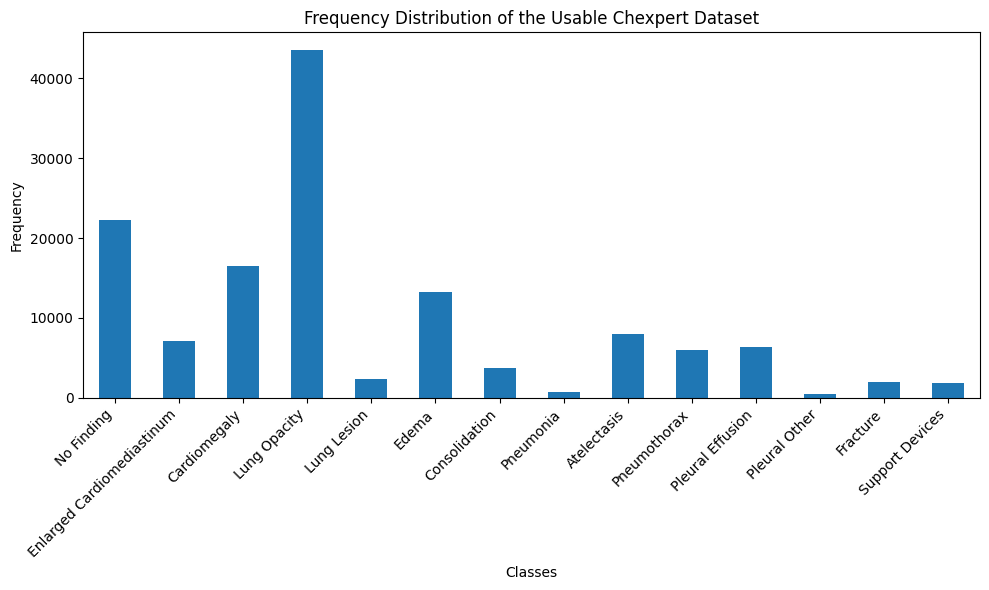

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_single_class is your DataFrame after processing
# Example of columns for classes
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Replace this with your actual dataframe
# df_single_class = your_processed_dataframe

# Count occurrences of '1' in each column (i.e., each class)
class_counts = df_single_class[cols].sum()

# Print the frequency count for each class separately
print("Frequency Count for Each Class:")
for col, count in class_counts.items():
    print(f"{col}: {count}")

# Print the total occurrences across all classes
total_count = class_counts.sum()
print(f"\nTotal occurrences across all classes: {total_count}")

# Create a bar plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')

# Add title and labels
plt.title('Frequency Distribution of the Usable Chexpert Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
# Define the class columns
cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
        'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 
        'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 
        'Pleural Other', 'Fracture', 'Support Devices']

# Check for rows with more than one '1'
rows_with_multiple_ones = df_chexpert_test[cols].sum(axis=1) > 1

# Get the rows where there is more than one '1'
multiple_ones_df = df_chexpert_test[rows_with_multiple_ones]

# Display the count of rows with more than one '1'
count_multiple_ones = multiple_ones_df.shape[0]
print(f"Number of rows with more than one '1': {count_multiple_ones}")

# Optionally, display the rows with multiple '1's
multiple_ones_df.head()
# Assuming df_single_class is defined and df_chexpert_test is a subset
df_chexpert_test = df_single_class[100000:125000]

# Define the relevant columns for the classes of interest
selected_classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

# Filter the rows where at least one of these classes has a '1'
df_selected_classes = df_chexpert_test[df_chexpert_test[selected_classes].sum(axis=1) > 0]

# Display the filtered DataFrame
df_selected_classes.tail()


Number of rows with more than one '1': 0


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient,Study
201117,CheXpert-v1.0-small/train/patient50049/study1/...,Male,67,Lateral,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,patient50049,study1
201125,CheXpert-v1.0-small/train/patient50053/study3/...,Female,67,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50053,study3
201127,CheXpert-v1.0-small/train/patient50053/study1/...,Female,67,Frontal,AP,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50053,study1
201133,CheXpert-v1.0-small/train/patient50055/study2/...,Male,59,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,patient50055,study2
201142,CheXpert-v1.0-small/train/patient50061/study1/...,Male,83,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient50061,study1


In [16]:
# Add the 'Path' column along with the selected class columns
essential_columns = ['Path'] + selected_classes

# Filter the DataFrame to keep only the 'Path' and class columns
df_filtered_selected_classes_with_path = df_selected_classes[essential_columns]

# Display the filtered DataFrame with 'Path' and class columns
df_filtered_selected_classes_with_path.head()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
160046,CheXpert-v1.0-small/train/patient37436/study3/...,0.0,0.0,0.0,1.0,0.0
160047,CheXpert-v1.0-small/train/patient37436/study5/...,0.0,0.0,0.0,1.0,0.0
160055,CheXpert-v1.0-small/train/patient37438/study5/...,0.0,0.0,1.0,0.0,0.0
160058,CheXpert-v1.0-small/train/patient37438/study6/...,0.0,0.0,1.0,0.0,0.0
160063,CheXpert-v1.0-small/train/patient37442/study1/...,0.0,0.0,0.0,1.0,0.0


In [17]:
df_test =df_filtered_selected_classes_with_path

In [18]:
# Get the frequency count of '1's for each class column
class_frequencies = df_test[selected_classes].sum()

# Display the frequency count
print(class_frequencies)


Atelectasis         1543.0
Cardiomegaly        2960.0
Consolidation        700.0
Edema               3192.0
Pleural Effusion     952.0
dtype: float64


In [19]:
# Assuming 'Path' variable contains the new path you want to use
new_path = path  # Replace 'Path' with the actual value stored in the Path variable

# Replace "CheXpert-v1.0-small/" in the 'Path' column with the new path
df_test['Path'] = df_test['Path'].str.replace("CheXpert-v1.0-small/", new_path, regex=False)

# Display the updated 'Path' column
df_test['Path'].head()


/tmp/ipykernel_12231/1007401961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Path'] = df_test['Path'].str.replace("CheXpert-v1.0-small/", new_path, regex=False)


160046    /imaging/students/Abhi/project/CheXpert_datase...
160047    /imaging/students/Abhi/project/CheXpert_datase...
160055    /imaging/students/Abhi/project/CheXpert_datase...
160058    /imaging/students/Abhi/project/CheXpert_datase...
160063    /imaging/students/Abhi/project/CheXpert_datase...
Name: Path, dtype: object

In [20]:
df_test.shape

(9347, 6)

## Hybrid (B)

In [ ]:
!pip install git+https://github.com/RyanWangZf/MedCLIP.git

Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.tra

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_566053/566761858.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.4612
Epoch 2/20, Fold 1, Loss: 1.2827
Epoch 3/20, Fold 1, Loss: 1.2259
Epoch 4/20, Fold 1, Loss: 1.2017
Epoch 5/20, Fold 1, Loss: 1.1894
Epoch 6/20, Fold 1, Loss: 1.1823
Epoch 7/20, Fold 1, Loss: 1.1777
Epoch 8/20, Fold 1, Loss: 1.1750
Epoch 9/20, Fold 1, Loss: 1.1717
Epoch 10/20, Fold 1, Loss: 1.1704
Epoch 11/20, Fold 1, Loss: 1.1683
Epoch 12/20, Fold 1, Loss: 1.1664
Epoch 13/20, Fold 1, Loss: 1.1641
Epoch 14/20, Fold 1, Loss: 1.1628
Epoch 15/20, Fold 1, Loss: 1.1618
Epoch 16/20, Fold 1, Loss: 1.1600
Epoch 17/20, Fold 1, Loss: 1.1590
Epoch 18/20, Fold 1, Loss: 1.1587
Epoch 19/20, Fold 1, Loss: 1.1571
Epoch 20/20, Fold 1, Loss: 1.1552

Fold 1:
Accuracy: 0.5620, Precision: 0.5086, Recall: 0.5308, F1 Score: 0.5109
Confusion Matrix:
[[177  15  14  29  73]
 [ 38 374  36  94  50]
 [ 16  14  60  24  26]
 [100  71  48 350  70]
 [ 46  12  16  27  90]]
Fold 2: Train siz

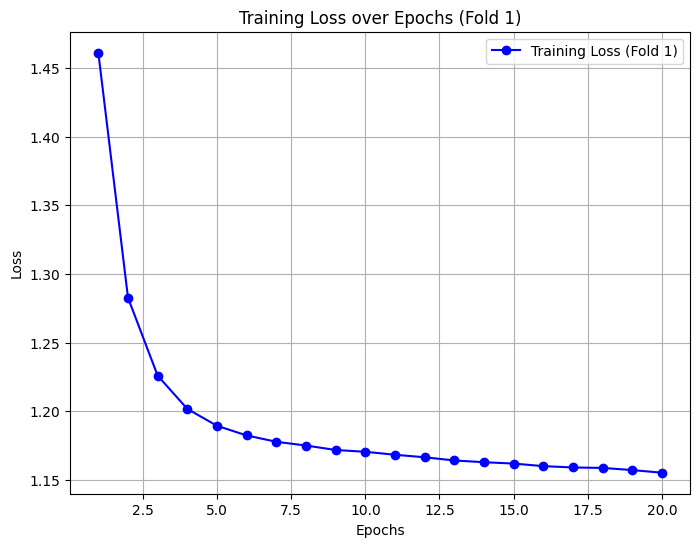

In [33]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.00007)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_B, all_labels_B = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_B.extend(probabilities)
            all_labels_B.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_B, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_B, all_predictions)
    precision = precision_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_B, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_B, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [34]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("Hybrid: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


Hybrid: Average metrics across five folds:
    index        0
 Accuracy 0.557078
Precision 0.500660
   Recall 0.524812
 F1 Score 0.502399


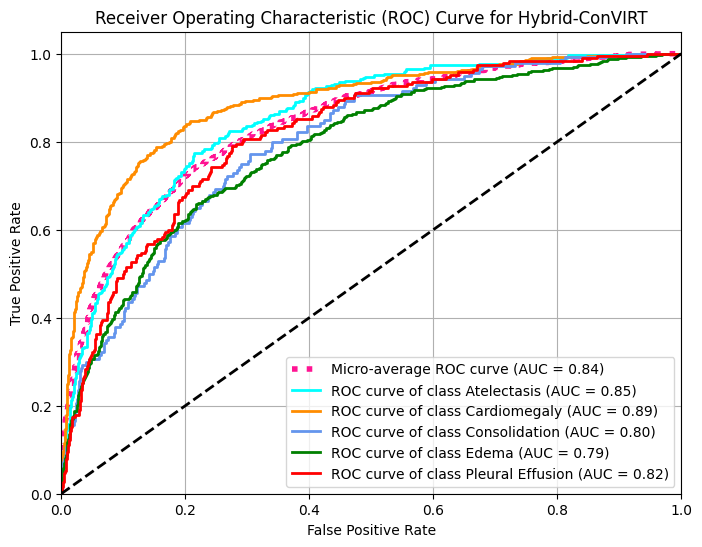

In [35]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_B = np.array(all_probabilities_B)  # Shape: (N_samples, n_classes)
all_labels_all_folds_B = np.array(all_labels_B)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_B = label_binarize(all_labels_all_folds_B, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_B[:, i], all_probabilities_all_folds_B[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_B.ravel(), all_probabilities_all_folds_B.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


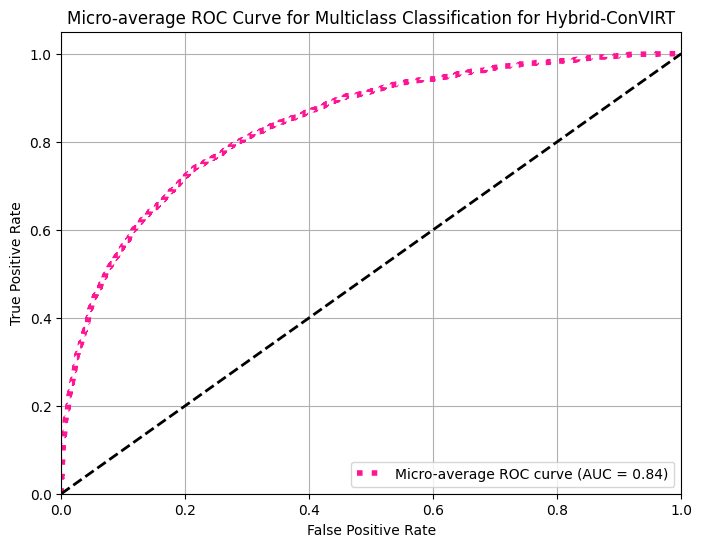

0.8398021161921825


In [36]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_B = label_binarize(all_labels_B, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_B.ravel(), np.array(all_probabilities_B).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for Hybrid-ConVIRT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(roc_auc_micro)


## MedCLIP A

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: Futu

load model weight from: ./pretrained/medclip-vit


/tmp/ipykernel_566053/2376166461.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.2661
Epoch 2/20, Fold 1, Loss: 1.2143
Epoch 3/20, Fold 1, Loss: 1.2154
Epoch 4/20, Fold 1, Loss: 1.1934
Epoch 5/20, Fold 1, Loss: 1.1822
Epoch 6/20, Fold 1, Loss: 1.1752
Epoch 7/20, Fold 1, Loss: 1.1691
Epoch 8/20, Fold 1, Loss: 1.1598
Epoch 9/20, Fold 1, Loss: 1.1696
Epoch 10/20, Fold 1, Loss: 1.1600
Epoch 11/20, Fold 1, Loss: 1.1658
Epoch 12/20, Fold 1, Loss: 1.1443
Epoch 13/20, Fold 1, Loss: 1.1406
Epoch 14/20, Fold 1, Loss: 1.1444
Epoch 15/20, Fold 1, Loss: 1.1449
Epoch 16/20, Fold 1, Loss: 1.1330
Epoch 17/20, Fold 1, Loss: 1.1305
Epoch 18/20, Fold 1, Loss: 1.1369
Epoch 19/20, Fold 1, Loss: 1.1405
Epoch 20/20, Fold 1, Loss: 1.1289

Fold 1:
Accuracy: 0.5663, Precision: 0.5160, Recall: 0.5383, F1 Score: 0.5152
Confusion Matrix:
[[152  20  16  31  89]
 [ 25 411  30  71  55]
 [ 10  17  62  22  29]
 [ 69  98  58 330  84]
 [ 31  16  16  24 104]]
Fold 2: Train siz

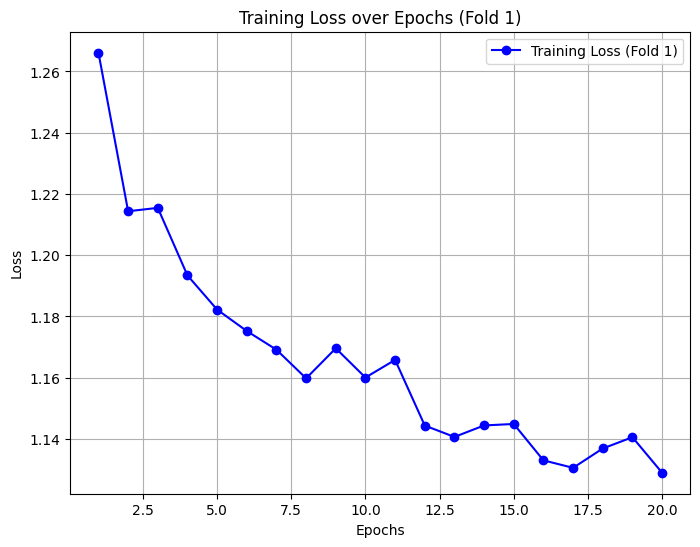

In [39]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor
processor = MedCLIPProcessor()

# Initialize MedCLIP Model
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using MedCLIP's image encoder
def process_images_with_medclip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the MedCLIP processor
        inputs = processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using MedCLIP's image encoder
            image_features = model.vision_model(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using MedCLIP
embeddings = process_images_with_medclip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.0015)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_A, all_labels_A = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_A.extend(probabilities)
            all_labels_A.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_A, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_A, all_predictions)
    precision = precision_score(all_labels_A, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_A, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_A, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_A, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [40]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("MedCLIP: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


MedCLIP: Average metrics across five folds:
    index        0
 Accuracy 0.537067
Precision 0.506658
   Recall 0.514073
 F1 Score 0.481429


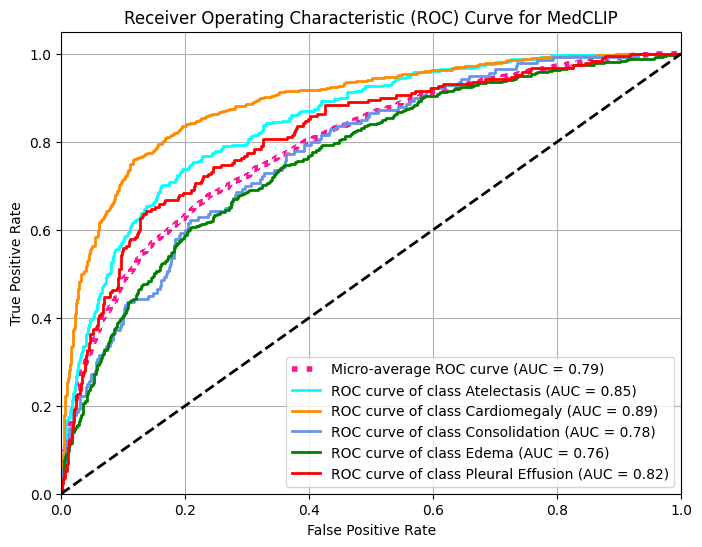

In [41]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_A = np.array(all_probabilities_A)  # Shape: (N_samples, n_classes)
all_labels_all_folds_A = np.array(all_labels_A)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_A = label_binarize(all_labels_all_folds_A, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_A[:, i], all_probabilities_all_folds_A[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_A.ravel(), all_probabilities_all_folds_A.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


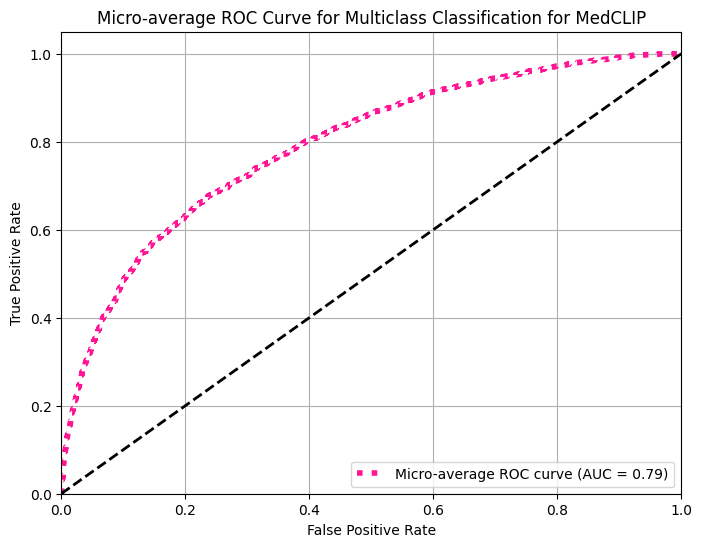

In [42]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_A = label_binarize(all_labels_A, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_A.ravel(), np.array(all_probabilities_A).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for MedCLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## CLIP (Biovil) C

/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/20, Fold 1, Loss: 1.6742
Epoch 2/20, Fold 1, Loss: 1.5890
Epoch 3/20, Fold 1, Loss: 1.5588
Epoch 4/20, Fold 1, Loss: 1.6013
Epoch 5/20, Fold 1, Loss: 1.5193
Epoch 6/20, Fold 1, Loss: 1.5418
Epoch 7/20, Fold 1, Loss: 1.4948
Epoch 8/20, Fold 1, Loss: 1.4593
Epoch 9/20, Fold 1, Loss: 1.4934
Epoch 10/20, Fold 1, Loss: 1.4731
Epoch 11/20, Fold 1, Loss: 1.5019
Epoch 12/20, Fold 1, Loss: 1.4486
Epoch 13/20, Fold 1, Loss: 1.4527
Epoch 14/20, Fold 1, Loss: 1.4605
Epoch 15/20, Fold 1, Loss: 1.4675
Epoch 16/20, Fold 1, Loss: 1.4537
Epoch 17/20, Fold 1, Loss: 1.4372
Epoch 18/20, Fold 1, Loss: 1.4499
Epoch 19/20, Fold 1, Loss: 1.4519
Epoch 20/20, Fold 1, Loss: 1.4047

Fold 1:
Accuracy: 0.2754, Precision: 0.3093, Recall: 0.2968, F1 Score: 0.2575
Confusion Matrix:
[[ 85  35  37  15 136]
 [ 62 213  49  41 227]
 [ 16  20  28  22  54]
 [ 94 137  84  93 231]
 [ 34  25  22  14  96]]
Fold 2: Train siz

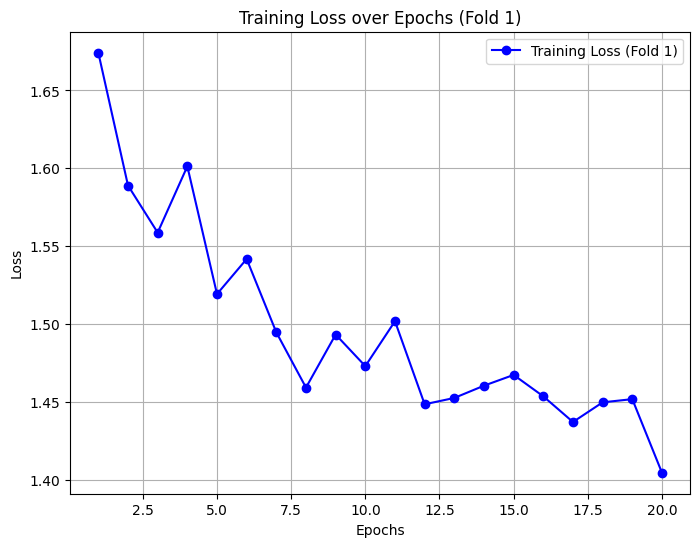

In [43]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from transformers import CLIPProcessor, CLIPModel

# Initialize the CLIP Processor and Model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.cuda()

# Map labels to numeric values for the five classes
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing the data for classification
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using CLIP's image encoder
def process_images_with_clip(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Preprocess the image using the CLIP processor
        inputs = clip_processor(images=image, return_tensors="pt")
        inputs = {k: v.cuda() for k, v in inputs.items()}
        
        with torch.no_grad():
            # Extract image features using CLIP's image encoder
            image_features = clip_model.get_image_features(**inputs)
            
            # Convert to NumPy array and flatten
            image_embedding = image_features.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using CLIP
embeddings = process_images_with_clip(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label

# Linear probe model
class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # 5 output classes for multiclass classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.025)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 20  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)  # No need to squeeze output for CrossEntropyLoss
            loss = criterion(outputs, labels)  # CrossEntropyLoss expects logits (no sigmoid)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_C, all_labels_C = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_C.extend(probabilities)
            all_labels_C.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_C, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_C, all_predictions)
    precision = precision_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_C, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_C, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [44]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("BioVIL: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


BioVIL: Average metrics across five folds:
    index        0
 Accuracy 0.313366
Precision 0.311898
   Recall 0.291978
 F1 Score 0.249957


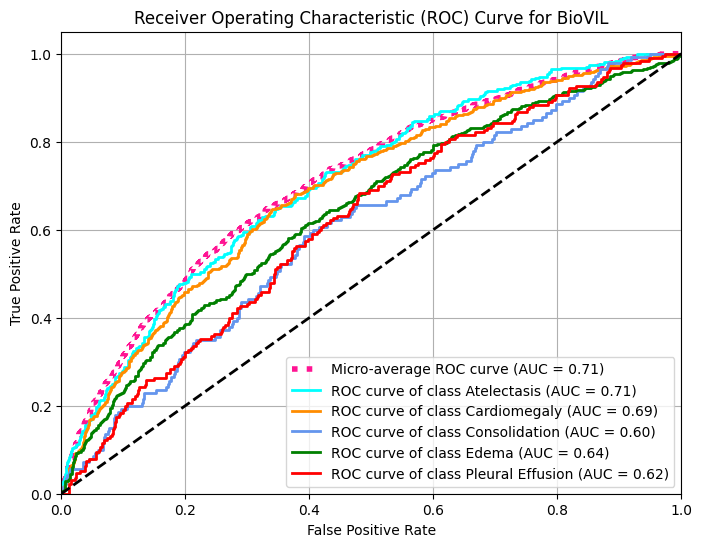

In [84]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_C = np.array(all_probabilities_C)  # Shape: (N_samples, n_classes)
all_labels_all_folds_C = np.array(all_labels_C)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_C = label_binarize(all_labels_all_folds_C, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_C[:, i], all_probabilities_all_folds_C[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_C.ravel(), all_probabilities_all_folds_C.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BioVIL')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


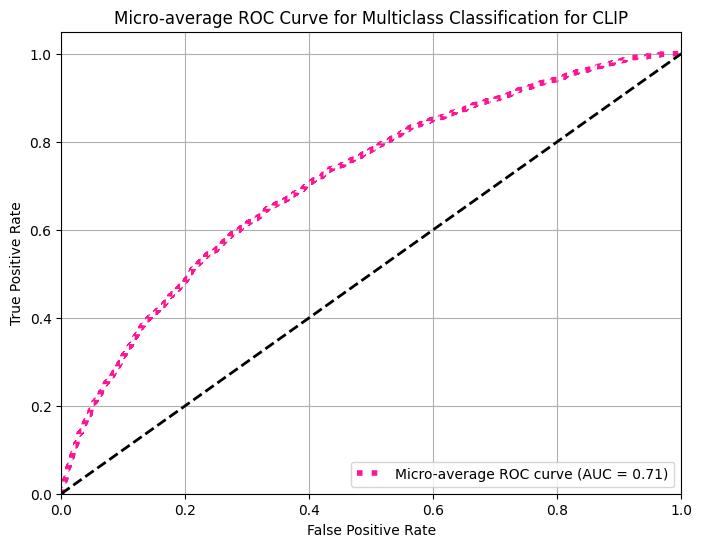

In [46]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_C = label_binarize(all_labels_C, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_C.ravel(), np.array(all_probabilities_C).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## CLIP (D)

In [48]:
!git clone https://github.com/microsoft/hi-ml.git

fatal: destination path 'hi-ml' already exists and is not an empty directory.


In [60]:
pwd

'/imaging/students/Abhi/project'

In [52]:
ls

'Balanced Dataset'/
 biomedclip/
 checkpoint_epoch_25.pth
 checkpoint_epoch_30.pth
 checkpoint_epoch_35.pth
 checkpoint_epoch_40.pth
 checkpoint_epoch_45.pth
 checkpoint_epoch_50.pth
 checkpoint_epoch_55.pth
 checkpoint_epoch_60.pth
 checkpoints/
 CheXpert_dataset/
 chexpert_last.ipynb
 contrastive_similarity_matrix.npy
 convirt_model_weights.pth
 df_with_captions.pkl
 envenv/
 hi-ml/
'Hyperparameter tuning results towards the FSM.ipynb'
 log_hyper_towardsFSM/
 myenv/
 pnemoniaTBlp.ipynb
 predicted_similarity_matrix.pt
'Preprocessing and Model Building .ipynb'
 pretrained/
 requirements.txt
'Some preprocessing.ipynb'
 Untitled1.ipynb
 Untitled2.ipynb


In [64]:
import sys
sys.path.append('/hi-ml/hi-ml-multimodal/src')

/tmp/ipykernel_566053/2411642996.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


Fold 1: Train size before SMOTE: 7477, Validation size: 1870
Fold 1: Train size after SMOTE: 12765
Epoch 1/10, Fold 1, Loss: 1.6943
Epoch 2/10, Fold 1, Loss: 1.6975
Epoch 3/10, Fold 1, Loss: 1.6774
Epoch 4/10, Fold 1, Loss: 1.6758
Epoch 5/10, Fold 1, Loss: 1.6729
Epoch 6/10, Fold 1, Loss: 1.6622
Epoch 7/10, Fold 1, Loss: 1.6605
Epoch 8/10, Fold 1, Loss: 1.6645
Epoch 9/10, Fold 1, Loss: 1.6602
Epoch 10/10, Fold 1, Loss: 1.6675

Fold 1:
Accuracy: 0.3155, Precision: 0.2174, Recall: 0.2569, F1 Score: 0.1983
Confusion Matrix:
[[173  95   0  26  14]
 [172 358   0  49  13]
 [ 46  75   0  12   7]
 [236 333   0  52  18]
 [ 81  93   0  10   7]]
Fold 2: Train size before SMOTE: 7477, Validation size: 1870
Fold 2: Train size after SMOTE: 12765
Epoch 1/10, Fold 2, Loss: 1.6945
Epoch 2/10, Fold 2, Loss: 1.6842
Epoch 3/10, Fold 2, Loss: 1.6879
Epoch 4/10, Fold 2, Loss: 1.6791
Epoch 5/10, Fold 2, Loss: 1.6718
Epoch 6/10, Fold 2, Loss: 1.6663
Epoch 7/10, Fold 2, Loss: 1.6708
Epoch 8/10, Fold 2, Loss: 1

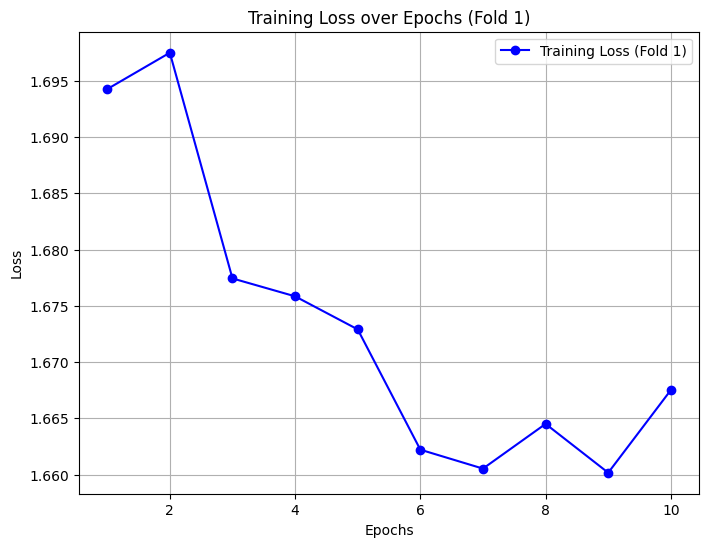

In [77]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from health_multimodal.image.model.model import ImageModel  # Import the BioViL ImageModel
import torchvision.transforms as transforms

# Initialize the BioViL image encoder with ResNet50 as the encoder type
img_encoder_type = "resnet50_multi_image"  # Use the appropriate string for ResNet50
joint_feature_size = 512  # Adjust this based on the model's requirements

# Instantiate the ImageModel with ResNet50 (or ViT if needed)
image_encoder = ImageModel(img_encoder_type=img_encoder_type, joint_feature_size=joint_feature_size)
image_encoder.cuda()
image_encoder.eval()  # Set to evaluation mode if you do not plan to fine-tune it

# Define image preprocessing pipeline for BioViL
preprocess_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 as expected by the model
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Map labels to numeric values for multi-class classification (5 classes for CheXpert)
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing all data
# Add numeric label column
df_test['label_numeric'] = df_test[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to process images and extract embeddings using BioViL's image encoder
def process_images_with_biovil_image_encoder(df):
    embeddings = []
    for idx, row in df.iterrows():
        img_path = row['Path']
        label = row['label_numeric']

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        # Apply transformation
        image_tensor = preprocess_transform(image).unsqueeze(0).cuda()  # Add a batch dimension and move to GPU
        
        with torch.no_grad():
            # Extract features using BioViL image encoder
            image_features = image_encoder(image_tensor)
            
            # Extract the global projected embedding
            image_embedding = image_features.projected_global_embedding.cpu().numpy().flatten()
            
        embeddings.append([img_path, label, image_embedding])
    return embeddings

# Process images to get embeddings using BioViL
embeddings = process_images_with_biovil_image_encoder(df_test)

# Extract embeddings and labels
emb = []
labels = []
for item in embeddings:
    _, label, image_embedding = item
    emb.append(image_embedding)
    labels.append(label)

# Convert embeddings and labels to NumPy arrays
embedding_array = np.array(emb)
labels_array = np.array(labels)

# Define the dataset class using resampled data
class EmbeddingsDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        embedding = torch.tensor(self.embeddings[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Long labels for CrossEntropyLoss

        return embedding, label


class LinearProbe(nn.Module):
    def __init__(self, input_dim, num_classes=5):  # Five output classes for multi-class classification
        super(LinearProbe, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)  # Five output units

    def forward(self, x):
        return self.fc(x)

# Initialize the necessary variables for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_number = 1
input_dim = embedding_array.shape[1]

# Initialize a list to store loss values for plotting (for only one fold)
loss_values = []
all_fold_results = []

for train_index, val_index in kf.split(embedding_array, labels_array):
    print(f"Fold {fold_number}: Train size before SMOTE: {len(train_index)}, Validation size: {len(val_index)}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = embedding_array[train_index], embedding_array[val_index]
    y_train_fold, y_val_fold = labels_array[train_index], labels_array[val_index]

    # Apply SMOTE only to the training fold
    smote = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the new training size after SMOTE
    print(f"Fold {fold_number}: Train size after SMOTE: {len(X_train_fold_resampled)}")

    # Create Dataset and DataLoader for this fold
    train_dataset_fold = EmbeddingsDataset(X_train_fold_resampled, y_train_fold_resampled)
    val_dataset_fold = EmbeddingsDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Initialize the linear probe model
    classifier_model = LinearProbe(input_dim).cuda()

    # Initialize the loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(classifier_model.parameters(), lr=0.0008)

    # Store loss values for the first fold, but training will happen for all folds
    loss_tracking = (fold_number == 1)

    # Training loop for this fold
    num_epochs = 10  # Adjust as necessary
    for epoch in range(num_epochs):
        classifier_model.train()
        running_loss = 0.0
        for embeddings, labels in train_loader_fold:
            embeddings, labels = embeddings.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = classifier_model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader_fold)
        if loss_tracking:  # Track loss for fold 1 only
            loss_values.append(avg_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Fold {fold_number}, Loss: {avg_loss:.4f}")

    # Reset collected probabilities and labels for the current fold
    all_probabilities_D, all_labels_D = [], []

    # Evaluation for this fold
    classifier_model.eval()
    with torch.no_grad():
        for embeddings, labels in val_loader_fold:
            embeddings = embeddings.cuda()
            outputs = classifier_model(embeddings)
            probabilities = F.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities for all classes

            all_probabilities_D.extend(probabilities)
            all_labels_D.extend(labels.numpy())

    # Evaluate the predictions by using argmax to pick the class with the highest probability
    all_predictions = np.argmax(all_probabilities_D, axis=1)

    # Calculate evaluation metrics using macro-averaging
    accuracy = accuracy_score(all_labels_D, all_predictions)
    precision = precision_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels_D, all_predictions, average='macro', zero_division=0)
    cm = confusion_matrix(all_labels_D, all_predictions)

    fold_results = {
        'Fold': fold_number,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

    all_fold_results.append(fold_results)

    print(f"\nFold {fold_number}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    fold_number += 1

# Convert all fold results to a DataFrame and display
all_results_df = pd.DataFrame(all_fold_results)
print("\nAll Fold Results:")
print(all_results_df.to_string(index=False))

# Plot the loss values after training (for the first fold only)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', color='b', label='Training Loss (Fold 1)')
plt.title('Training Loss over Epochs (Fold 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


In [78]:
# Remove the 'Fold' column and the 'Confusion Matrix' column before calculating the averages
average_metrics = all_results_df.drop(columns=['Fold', 'Confusion Matrix']).mean().reset_index()

# Display the average metrics table
print("CLIP: Average metrics across five folds:")
print(average_metrics.to_string(index=False))


CLIP: Average metrics across five folds:
    index        0
 Accuracy 0.220812
Precision 0.165627
   Recall 0.234240
 F1 Score 0.142951


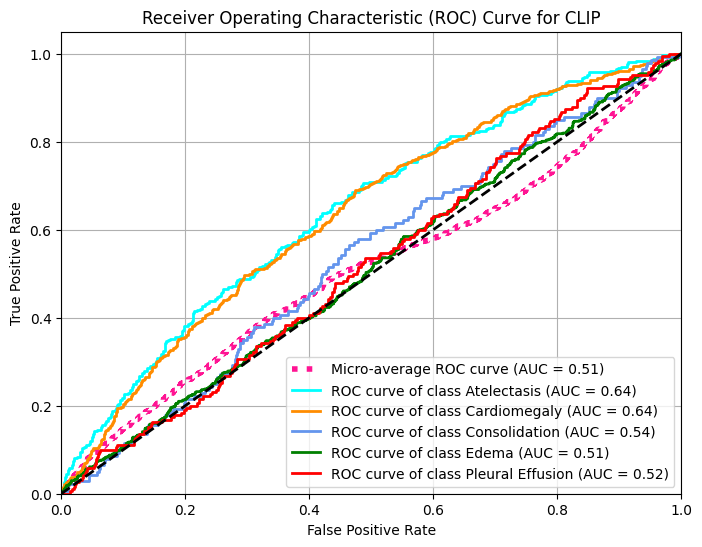

In [79]:
# After the cross-validation loop
# Convert lists to numpy arrays
all_probabilities_all_folds_D = np.array(all_probabilities_D)  # Shape: (N_samples, n_classes)
all_labels_all_folds_D = np.array(all_labels_D)                # Shape: (N_samples,)

# Binarize the labels for multiclass ROC computation
from sklearn.preprocessing import label_binarize
n_classes = 5  # Update number of classes
all_labels_binarized_D = label_binarize(all_labels_all_folds_D, classes=[0, 1, 2, 3, 4])  # Shape: (N_samples, n_classes)

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized_D[:, i], all_probabilities_all_folds_D[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized_D.ravel(), all_probabilities_all_folds_D.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


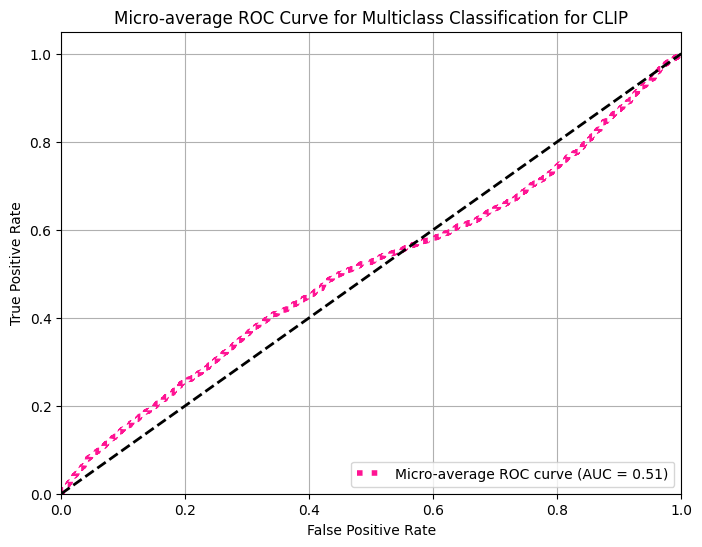

In [80]:
# Binarize the labels for multiclass ROC computation
n_classes = 5  # 5 classes
all_labels_binarized_D = label_binarize(all_labels_D, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels_binarized_D.ravel(), np.array(all_probabilities_D).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve for Multiclass Classification for CLIP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Combined ROC

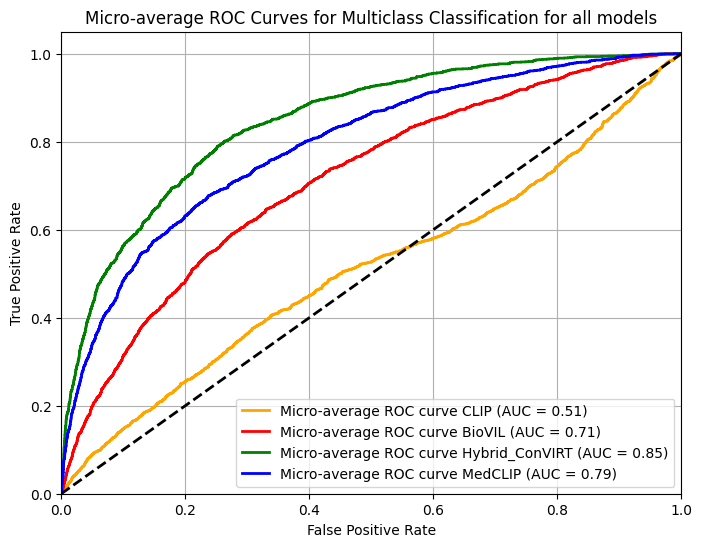

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC computation (assuming same labels for all models)
n_classes = 5  # 5 classes
all_labels_binarized_D = label_binarize(all_labels_D, classes=[0, 1, 2, 3, 4])
all_labels_binarized_C = label_binarize(all_labels_C, classes=[0, 1, 2, 3, 4])
all_labels_binarized_B = label_binarize(all_labels_B, classes=[0, 1, 2, 3, 4])
all_labels_binarized_A = label_binarize(all_labels_A, classes=[0, 1, 2, 3, 4])

# Compute micro-average ROC curve and ROC area for each model
fpr_micro_D, tpr_micro_D, _ = roc_curve(all_labels_binarized_D.ravel(), np.array(all_probabilities_D).ravel())
roc_auc_micro_D = auc(fpr_micro_D, tpr_micro_D)

fpr_micro_C, tpr_micro_C, _ = roc_curve(all_labels_binarized_C.ravel(), np.array(all_probabilities_C).ravel())
roc_auc_micro_C = auc(fpr_micro_C, tpr_micro_C)

fpr_micro_B, tpr_micro_B, _ = roc_curve(all_labels_binarized_B.ravel(), np.array(all_probabilities_B).ravel())
roc_auc_micro_B = auc(fpr_micro_B, tpr_micro_B)

fpr_micro_A, tpr_micro_A, _ = roc_curve(all_labels_binarized_A.ravel(), np.array(all_probabilities_A).ravel())
roc_auc_micro_A = auc(fpr_micro_A, tpr_micro_A)

# Plot the micro-average ROC curve for all models
plt.figure(figsize=(8, 6))

# Model D
plt.plot(fpr_micro_D, tpr_micro_D, color='orange', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve CLIP (AUC = {roc_auc_micro_D:.2f})')

# Model C
plt.plot(fpr_micro_C, tpr_micro_C, color='red', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve BioVIL (AUC = {roc_auc_micro_C:.2f})')

# Model B
plt.plot(fpr_micro_B, tpr_micro_B, color='green', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve Hybrid_ConVIRT (AUC = {roc_auc_micro_B:.2f})')

# Model A
plt.plot(fpr_micro_A, tpr_micro_A, color='blue', linestyle='-', linewidth=2,
         label=f'Micro-average ROC curve MedCLIP (AUC = {roc_auc_micro_A:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curves for Multiclass Classification for all models')
plt.legend(loc="lower right")
plt.grid(True)

# Show plot
plt.show()


## TSNE vizualization


In [40]:
!git clone https://github.com/microsoft/hi-ml.git

fatal: destination path 'hi-ml' already exists and is not an empty directory.


In [51]:
pwd

'/imaging/students/Abhi/project'

In [41]:
import sys
sys.path.append('/hi-ml/hi-ml-multimodal/src')

In [42]:
df_test.head(3)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,label_numeric
160046,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
160047,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
160055,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,1.0,0.0,0.0,2


In [43]:
# Get the frequency count of '1's for each class column
class_frequencies = df_test[selected_classes].sum()

# Display the frequency count
print(class_frequencies)

Atelectasis         1543.0
Cardiomegaly        2960.0
Consolidation        700.0
Edema               3192.0
Pleural Effusion     952.0
dtype: float64


In [44]:
df_test

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,label_numeric
160046,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
160047,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
160055,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,1.0,0.0,0.0,2
160058,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,1.0,0.0,0.0,2
160063,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...
201117,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
201125,/imaging/students/Abhi/project/CheXpert_datase...,0.0,0.0,0.0,1.0,0.0,3
201127,/imaging/students/Abhi/project/CheXpert_datase...,0.0,1.0,0.0,0.0,0.0,1
201133,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0


In [45]:
# Assign numeric labels to each class if not already done
selected_classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
label_mapping = {'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Pleural Effusion': 4}

# Ensure that 'label_numeric' is correctly created in df_test
df_test['label_numeric'] = df_test[selected_classes].idxmax(axis=1).map(label_mapping)

# Define the target sample size per class
target_sample_size = 700

# Sample up to 700 rows for each class, taking all if fewer are available
df_tsne = df_test.groupby('label_numeric').apply(lambda x: x.sample(n=min(len(x), target_sample_size), random_state=42)).reset_index(drop=True)


/tmp/ipykernel_4293/2486193447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[selected_classes].idxmax(axis=1).map(label_mapping)
/tmp/ipykernel_4293/2486193447.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_tsne = df_test.groupby('label_numeric').apply(lambda x: x.sample(n=min(len(x), target_sample_size), random_state=42)).reset_index(drop=True)


In [21]:

# Assign numeric labels to each class
selected_classes = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
label_mapping = {'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Pleural Effusion': 4}

# Create 'label_numeric' in df_test
df_test['label_numeric'] = df_test[selected_classes].idxmax(axis=1).map(label_mapping)

# Define the target sample size per class
target_sample_size = 700

# Sample up to 700 rows for each class, excluding 'Pleural Effusion' (label 4)
df_tsne = df_test[df_test['label_numeric'] != 4]  # Exclude Pleural Effusion
df_tsne = df_tsne.groupby('label_numeric').apply(lambda x: x.sample(n=min(len(x), target_sample_size), random_state=42)).reset_index(drop=True)

# Display the resulting DataFrame
df_tsne.head()

/tmp/ipykernel_12231/2703078845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_test[selected_classes].idxmax(axis=1).map(label_mapping)
/tmp/ipykernel_12231/2703078845.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_tsne = df_tsne.groupby('label_numeric').apply(lambda x: x.sample(n=min(len(x), target_sample_size), random_state=42)).reset_index(drop=True)


,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,label_numeric
0,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
1,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
2,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
3,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
4,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0


In [22]:
# Get the frequency count of '1's for each class column
class_frequencies = df_tsne[selected_classes].sum()

# Display the frequency count
print(class_frequencies)

Atelectasis         700.0
Cardiomegaly        700.0
Consolidation       700.0
Edema               700.0
Pleural Effusion      0.0
dtype: float64


In [23]:
df_tsne.head(2)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,label_numeric
0,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0
1,/imaging/students/Abhi/project/CheXpert_datase...,1.0,0.0,0.0,0.0,0.0,0


In [49]:
import health_multimodal

ModuleNotFoundError: No module named 'health_multimodal'

In [63]:
pip install pydicom

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.4/2.4 MB 17.4 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_4293/2305310361.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label_numeric'] = df_tsne[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)


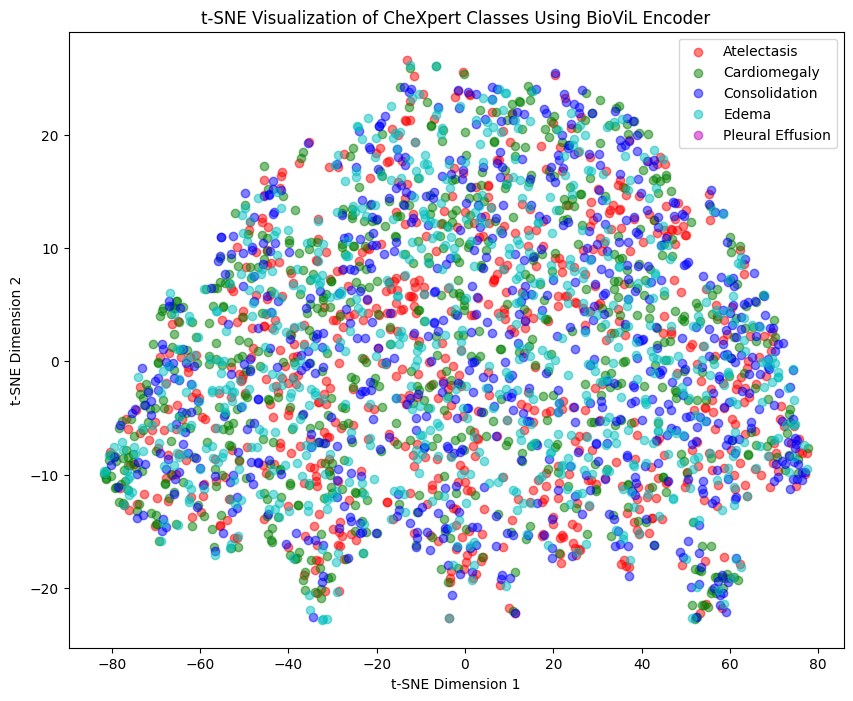

In [102]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision.transforms as transforms

# Define the image encoder and preprocessing transform
from hi_ml.hi_ml_multimodal.src.health_multimodal.image.model.model import ImageModel  # Import the BioViL ImageModel

# Initialize the BioViL image encoder with ResNet50 as the encoder type
img_encoder_type = "resnet50_multi_image"  # Use the appropriate string for ResNet50
joint_feature_size = 512  # Adjust this based on the model's requirements

# Instantiate the ImageModel with ResNet50 (or ViT if needed)
image_encoder = ImageModel(img_encoder_type=img_encoder_type, joint_feature_size=joint_feature_size)
image_encoder.cuda()
image_encoder.eval()  # Set to evaluation mode if you do not plan to fine-tune it

# Define image preprocessing pipeline for BioViL
preprocess_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 as expected by the model
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Map labels to numeric values for multi-class classification (5 classes for CheXpert)
label_mapping = {
    'Atelectasis': 0, 
    'Cardiomegaly': 1, 
    'Consolidation': 2, 
    'Edema': 3, 
    'Pleural Effusion': 4
}

# Assuming `df_test` is the DataFrame containing all data
# Add numeric label column
df_test['label_numeric'] = df_tsne[['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']].idxmax(axis=1).map(label_mapping)

# Function to extract features from the image encoder
def extract_features(image_paths, image_encoder, preprocess_transform):
    features = []
    for path in image_paths:
        # Load image with PIL
        image = Image.open(path).convert("RGB")  # Ensure RGB format
        image = preprocess_transform(image).unsqueeze(0).cuda()  # Add batch dimension and move to GPU

        # Extract features from the image encoder
        with torch.no_grad():
            feature = image_encoder(image).projected_global_embedding.cpu().numpy().flatten()  # Move to CPU and flatten
        features.append(feature)
    return features

# Extract features for each class
chexpert_image_paths = df_tsne['Path']  # Assuming this column contains the image paths
features = extract_features(chexpert_image_paths, image_encoder, preprocess_transform)

# Convert features list to a NumPy array
features_array = np.array(features)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_array)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
label_indices = df_tsne['label_numeric']  # Numeric labels based on mapped classes

for i, label in enumerate(labels):
    indices = label_indices == i
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], c=colors[i], label=label, alpha=0.5)

plt.title("t-SNE Visualization of CheXpert Classes Using BioViL Encoder")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [71]:
cd ../../..

/imaging/students/Abhi/project


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [27]:
!pip install open_clip_torch==2.23.0 transformers==4.35.2 matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.24.0
    Uninstalling transformers-4.24.0:
      Successfully uninstalled transformers-4.24.0


In [28]:
import json
from urllib.request import urlopen
from PIL import Image
import torch
from huggingface_hub import hf_hub_download
from open_clip import create_model_and_transforms, get_tokenizer
from open_clip.factory import HF_HUB_PREFIX, _MODEL_CONFIGS


# Download the model and config files
hf_hub_download(
    repo_id="microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224",
    filename="open_clip_pytorch_model.bin",
    local_dir="checkpoints"
)
hf_hub_download(
    repo_id="microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224",
    filename="open_clip_config.json",
    local_dir="checkpoints"
)

# Load the model and config files
model_name = "biomedclip_local"
with open("checkpoints/open_clip_config.json", "r") as f:
    config = json.load(f)
    model_cfg = config["model_cfg"]
    preprocess_cfg = config["preprocess_cfg"]

if (not model_name.startswith(HF_HUB_PREFIX)
    and model_name not in _MODEL_CONFIGS
    and config is not None):
    _MODEL_CONFIGS[model_name] = model_cfg

tokenizer = get_tokenizer(model_name)

# Initialize model and transforms without loading the checkpoint
model, _, preprocess = create_model_and_transforms(
    model_name=model_name,
    pretrained=None,  # Do not load weights here
    **{f"image_{k}": v for k, v in preprocess_cfg.items()},
)

# Manually load the checkpoint with strict=False
checkpoint_path = "checkpoints/open_clip_pytorch_model.bin"
state_dict = torch.load(checkpoint_path)
model.load_state_dict(state_dict, strict=False)

# Move the model to GPU if available
model.cuda()
model.eval()  # Set to evaluation mode if not fine-tuning


/home/asharma/.local/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more 

CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768

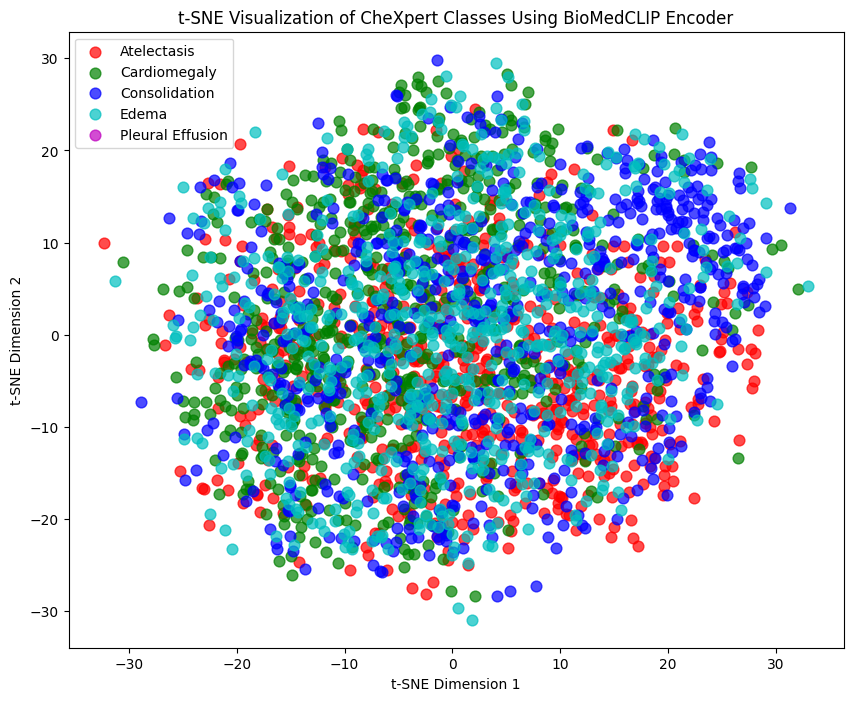

In [29]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from PIL import Image

# Assuming `preprocess` is the transform pipeline loaded with the model
# and `model` is the loaded BioMedCLIP model

# Define a function to preprocess images and extract features
def extract_features(image_paths, model, preprocess):
    features = []
    for path in image_paths:
        # Load and preprocess the image
        image = Image.open(path).convert("RGB")
        image = preprocess(image).unsqueeze(0).cuda()  # Add batch dimension and move to GPU

        # Extract features from the image encoder
        with torch.no_grad():
            feature = model.visual(image).cpu().numpy().flatten()  # Move to CPU and flatten
        features.append(feature)
    return features

# Assuming df_test['Path'] contains image paths and df_test['label_numeric'] has the labels
chexpert_image_paths = df_tsne['Path']
features = extract_features(chexpert_image_paths, model, preprocess)

# Convert features to a NumPy array for t-SNE
features_array = np.array(features)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features_array)

# Plotting the t-SNE results with adjusted axis limits and other parameters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
label_indices = df_tsne['label_numeric']

for i, label in enumerate(labels):
    indices = label_indices == i
    # Adding jitter to spread out overlapping points
    x = tsne_results[indices, 0] + np.random.normal(0, 0.5, len(tsne_results[indices, 0]))
    y = tsne_results[indices, 1] + np.random.normal(0, 0.5, len(tsne_results[indices, 1]))
    plt.scatter(x, y, c=colors[i], label=label, alpha=0.7, s=60)  # Adjusted alpha and size

# Set axis limits to ensure visibility
# plt.xlim(-50, 50)
# plt.ylim(-50, 50)

plt.title("t-SNE Visualization of CheXpert Classes Using BioMedCLIP Encoder")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [96]:
label_indices.shape

(3500,)

In [95]:
tsne_results.shape

(9347, 2)

In [77]:
print("Feature array shape:", features_array.shape)


Feature array shape: (9347, 512)


In [78]:
print("Check for NaNs in t-SNE results:", np.isnan(tsne_results).sum())


Check for NaNs in t-SNE results: 0


In [79]:
print("Sample t-SNE results:", tsne_results[:10])


Sample t-SNE results: [[  1.4943728 -38.79338  ]
 [ -1.9274135 -40.215317 ]
 [ -4.538967   52.399494 ]
 [ 29.182499   20.802605 ]
 [ -8.789921   -5.921075 ]
 [ 21.519358   30.226574 ]
 [ 21.516712  -12.395988 ]
 [ 27.127827  -29.199692 ]
 [ 29.19008   -18.714388 ]
 [ -9.245565   78.01396  ]]


In [110]:
ls

 biomedclip/
 checkpoint_epoch_25.pth
 checkpoint_epoch_30.pth
 checkpoint_epoch_35.pth
 checkpoint_epoch_40.pth
 checkpoint_epoch_45.pth
 checkpoint_epoch_50.pth
 checkpoint_epoch_55.pth
 checkpoint_epoch_60.pth
 checkpoints/
 CheXpert_dataset/
 chexpert_last.ipynb
 contrastive_similarity_matrix.npy
 convirt_model_weights.pth
 df_with_captions.pkl
 envenv/
 hi_ml/
'Hyperparameter tuning results towards the FSM.ipynb'
 log_hyper_towardsFSM/
 myenv/
 pnemoniaTBlp.ipynb
 predicted_similarity_matrix.pt
'Preprocessing and Model Building .ipynb'
 pretrained/
 requirements.txt
'Some preprocessing.ipynb'
 Untitled1.ipynb
 Untitled2.ipynb


In [1]:
!pip install git+https://github.com/RyanWangZf/MedCLIP.git


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/RyanWangZf/MedCLIP.git to /tmp/pip-req-build-mf68z4pj
  Running command git clone --filter=blob:none --quiet https://github.com/RyanWangZf/MedCLIP.git /tmp/pip-req-build-mf68z4pj
  Resolved https://github.com/RyanWangZf/MedCLIP.git to commit 9c3396f20d5d54e4fae241b8cb06ca45848e98c9
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.1
    Uninstalling tokenizers-0.20.1:
      Successfully uninstalled tokenizers-0.20.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.0
    Uninstalling transformers-4.46.0:
      Successfully uninstalled transformers-4.46.0


In [24]:
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT


2024-10-26 20:15:18.569821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 20:15:18.569981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 20:15:18.797901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 20:15:25.192075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


/home/asharma/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/asharma/.local/lib/python3.10/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining mo

load model weight from: ./pretrained/medclip-vit


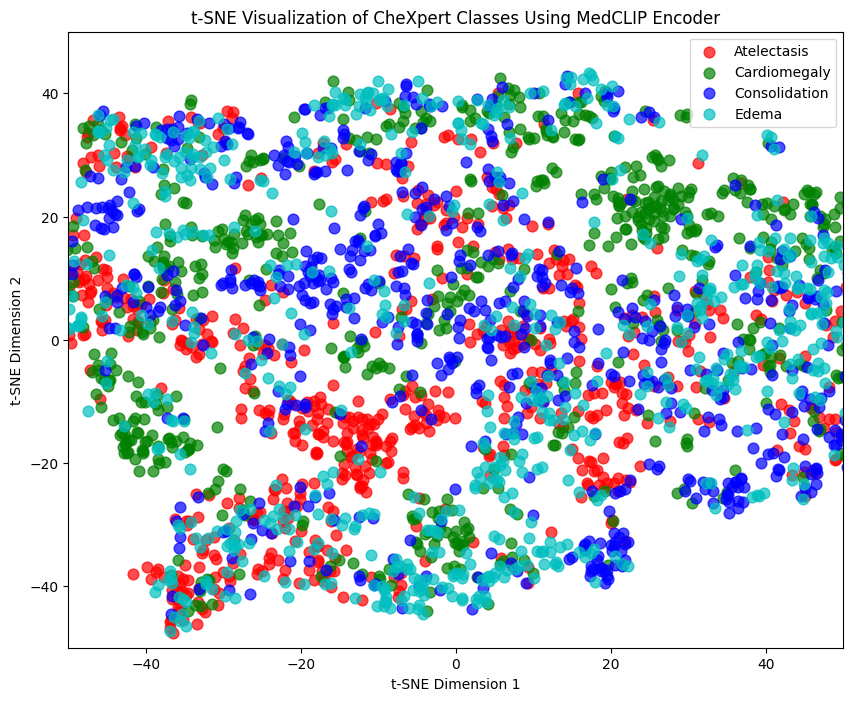

In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from PIL import Image
from medclip import MedCLIPProcessor, MedCLIPModel, MedCLIPVisionModelViT

# Initialize MedCLIP Processor and Model
processor = MedCLIPProcessor()
model = MedCLIPModel(vision_cls=MedCLIPVisionModelViT)
model.from_pretrained()
model.cuda()
model.eval()  # Set to evaluation mode

# Define a function to preprocess images and extract features using MedCLIP
def extract_features(image_paths, model, processor):
    features = []
    for path in image_paths:
        # Load and preprocess the image
        image = Image.open(path).convert("RGB")
        image = processor(images=image, return_tensors="pt")['pixel_values'].cuda()  # Process image and move to GPU

        # Extract features from the image encoder
        with torch.no_grad():
            feature = model.vision_model(image).cpu().numpy().flatten()  # Move to CPU and flatten
        features.append(feature)
    return features

# Assuming df_tsne['Path'] contains image paths and df_tsne['label_numeric'] has the labels
chexpert_image_paths = df_tsne['Path']
features = extract_features(chexpert_image_paths, model, processor)

# Convert features to a NumPy array for t-SNE
features_array = np.array(features)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_array)

# Plotting the t-SNE results with adjusted axis limits and other parameters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c']  # Adjusted to match only four classes (no Pleural Effusion)
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema']
label_indices = df_tsne['label_numeric']

for i, label in enumerate(labels):
    indices = label_indices == i
    # Adding jitter to spread out overlapping points
    x = tsne_results[indices, 0] + np.random.normal(0, 0.5, len(tsne_results[indices, 0]))
    y = tsne_results[indices, 1] + np.random.normal(0, 0.5, len(tsne_results[indices, 1]))
    plt.scatter(x, y, c=colors[i], label=label, alpha=0.7, s=60)  # Adjusted alpha and size

# Optional: Set axis limits to ensure visibility
plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.title("t-SNE Visualization of CheXpert Classes Using MedCLIP Encoder")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()
